# In this file we examine the data of $S_{diff}(t)$ as a function of how many initial conditions it's avraged over

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

N_val = 4

num_unit_cells_vals = [32]
num_init_cond_vals = [100, 1_000, 5_000, 10_000]

a_val = 0.7615
a_val_name = str(a_val).replace(".", "p")

z_vals = [1.6, 1.7]
z_val_names = [str(z_val).replace(".", "p") for z_val in z_vals]

z_final = 1.6

data_parent_path = f"../data/spin_dists_per_time/N{N_val}/a{a_val_name}/IC1"

In [5]:
os.listdir(data_parent_path)

['.DS_Store', 'L512', 'L32', 'L256', 'L128', 'L64']

In [10]:
s_diffs_per_time = {} # L_val: {initcond: [s_diff(t)]}

for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    print(f"L = {L_val}")
    s_diffs_per_time[L_val] = {}

    final_time = int(L_val ** z_final)

    current_loaded_data = []

    for i, sample_file in enumerate(os.listdir(f"{data_parent_path}/L{L_val}")):
        valid_sample = False
        for z_val_name in z_val_names:
            if z_val_name in sample_file:
                valid_sample = True
        if not valid_sample:
            continue
        
        sample_num = i+1

        sample_file_path = f"{data_parent_path}/L{L_val}/{sample_file}"
        df = pd.read_csv(sample_file_path)

        current_loaded_data.append(df.loc[:99, "delta_s"])

        if sample_num in num_init_cond_vals:
            print(f"L = {L_val} | Reached {sample_num}/{max(num_init_cond_vals)} sample")
            s_diffs_per_time[L_val][sample_num] = np.mean(np.array(current_loaded_data).T, axis=1)

            if sample_num == max(num_init_cond_vals):
                print(f"L = {L_val} | Success: Made it to end - {sample_num}/{max(num_init_cond_vals)} sample")

L = 128
L = 128 | Reached 100/10000 sample
L = 128 | Reached 1000/10000 sample
L = 128 | Reached 5000/10000 sample
L = 128 | Reached 10000/10000 sample
L = 128 | Success: Made it to end - 10000/10000 sample


In [11]:
s_diffs_per_time

{128: {100: array([1.1608139 , 1.12221086, 1.11999318, 1.11937814, 1.08854679,
         1.04730768, 1.0164866 , 0.98953605, 0.97411616, 0.95653721,
         0.92842039, 0.91576999, 0.89750927, 0.87866557, 0.86442838,
         0.84160284, 0.84043139, 0.83925962, 0.83947084, 0.83140791,
         0.8379515 , 0.83782377, 0.83876841, 0.84775018, 0.85314406,
         0.8451602 , 0.82998387, 0.82276743, 0.8254554 , 0.82192732,
         0.82241632, 0.82456345, 0.81849203, 0.80648082, 0.79288404,
         0.79418474, 0.79627805, 0.77929002, 0.76840108, 0.771965  ,
         0.77167245, 0.77720944, 0.7684621 , 0.76988779, 0.78165301,
         0.76421088, 0.76463293, 0.76459976, 0.77439642, 0.77847215,
         0.78070137, 0.77087344, 0.77456948, 0.76965099, 0.78506552,
         0.75813051, 0.75805019, 0.77244173, 0.77679999, 0.77235316,
         0.78226199, 0.76672377, 0.76689356, 0.76385527, 0.77122508,
         0.77368526, 0.76202427, 0.77570654, 0.77190203, 0.75910006,
         0.76465052, 0.7

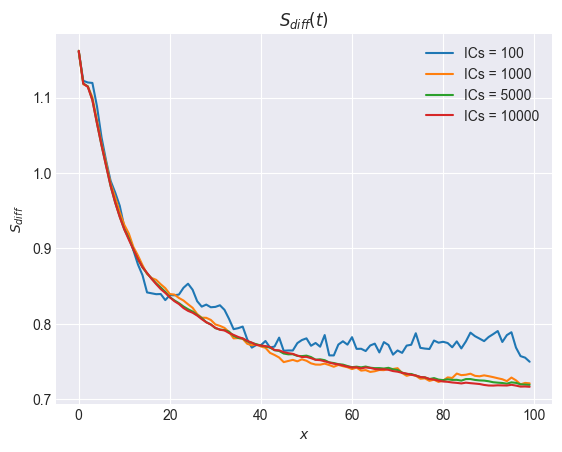

In [12]:
for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    for num_init_conds in num_init_cond_vals:
        plt.plot(s_diffs_per_time[L_val][num_init_conds], label=f"ICs = {num_init_conds}")

    plt.title(r"$S_{diff}(t)$")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$S_{diff}$")
    plt.legend()

    plt.show()